In [ ]:
import numpy as np
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

In [ ]:
%config Completer.use_jedi = False # for autocompletion to work

## Getting the EEG Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/archive_1.zip

Archive:  /content/drive/MyDrive/archive_1.zip
replace EEG_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
url1='/content/EEG_data.csv'
url2='/content/demographic_info.csv'
df = pd.read_csv(url1)
demo_df = pd.read_csv(url2)

In [ ]:

url1 = '/content/drive/MyDrive/EEG_data.csv'
url2 = '/content/drive/MyDrive/demographic_info.csv'
df = pd.read_csv(url1)
demo_df = pd.read_csv(url2)

In [ ]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


## Getting the demographic data

In [ ]:
demo_df.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [ ]:
## Renaming columns for easy merging
demo_df = demo_df.rename(columns = {'subject ID': 'SubjectID'})

In [ ]:
demo_df.head()

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [ ]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


### Merging both the dataframes based on SubjectId

In [ ]:
df = df.merge(demo_df,how = 'inner',on = 'SubjectID')

In [ ]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15   age                12811 non-null  int64  
 16   eth

### Having one hot encoding for categorical variables like gender and stuff

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [ ]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', ' age', ' ethnicity_Bengali',
       ' ethnicity_English', ' ethnicity_Han Chinese', ' gender_F',
       ' gender_M'],
      dtype='object')

In [ ]:
## Missing value check
print("Missing values count : " + str(df.isna().sum().sum()))

Missing values count : 0


In [ ]:
df[' gender_F'].value_counts()

0    10236
1     2575
Name:  gender_F, dtype: int64

In [ ]:
df['user-definedlabeln'].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

In [ ]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', ' age', ' ethnicity_Bengali',
       ' ethnicity_English', ' ethnicity_Han Chinese', ' gender_F',
       ' gender_M'],
      dtype='object')

In [ ]:
df.drop(['SubjectID','VideoID','predefinedlabel', ' gender_F',' ethnicity_English'],axis = 1,inplace=True)

In [ ]:
df = df[df['Attention']> 0.0]


In [ ]:
df.shape

(11388, 16)

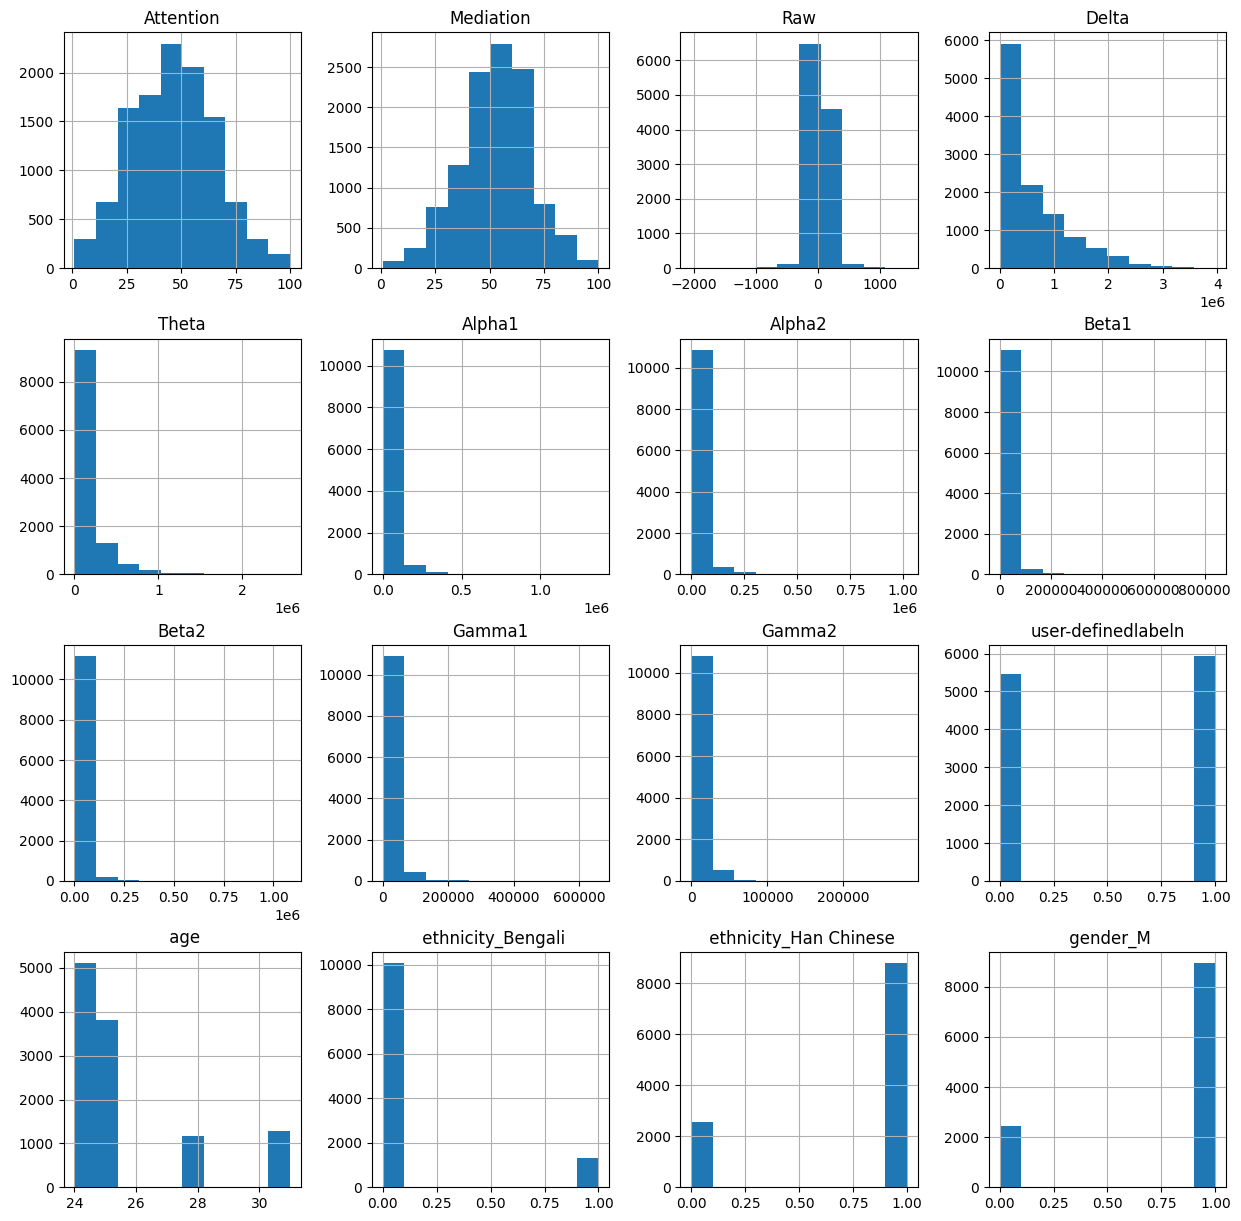

In [ ]:
df.hist(figsize = (15,15))
plt.show()

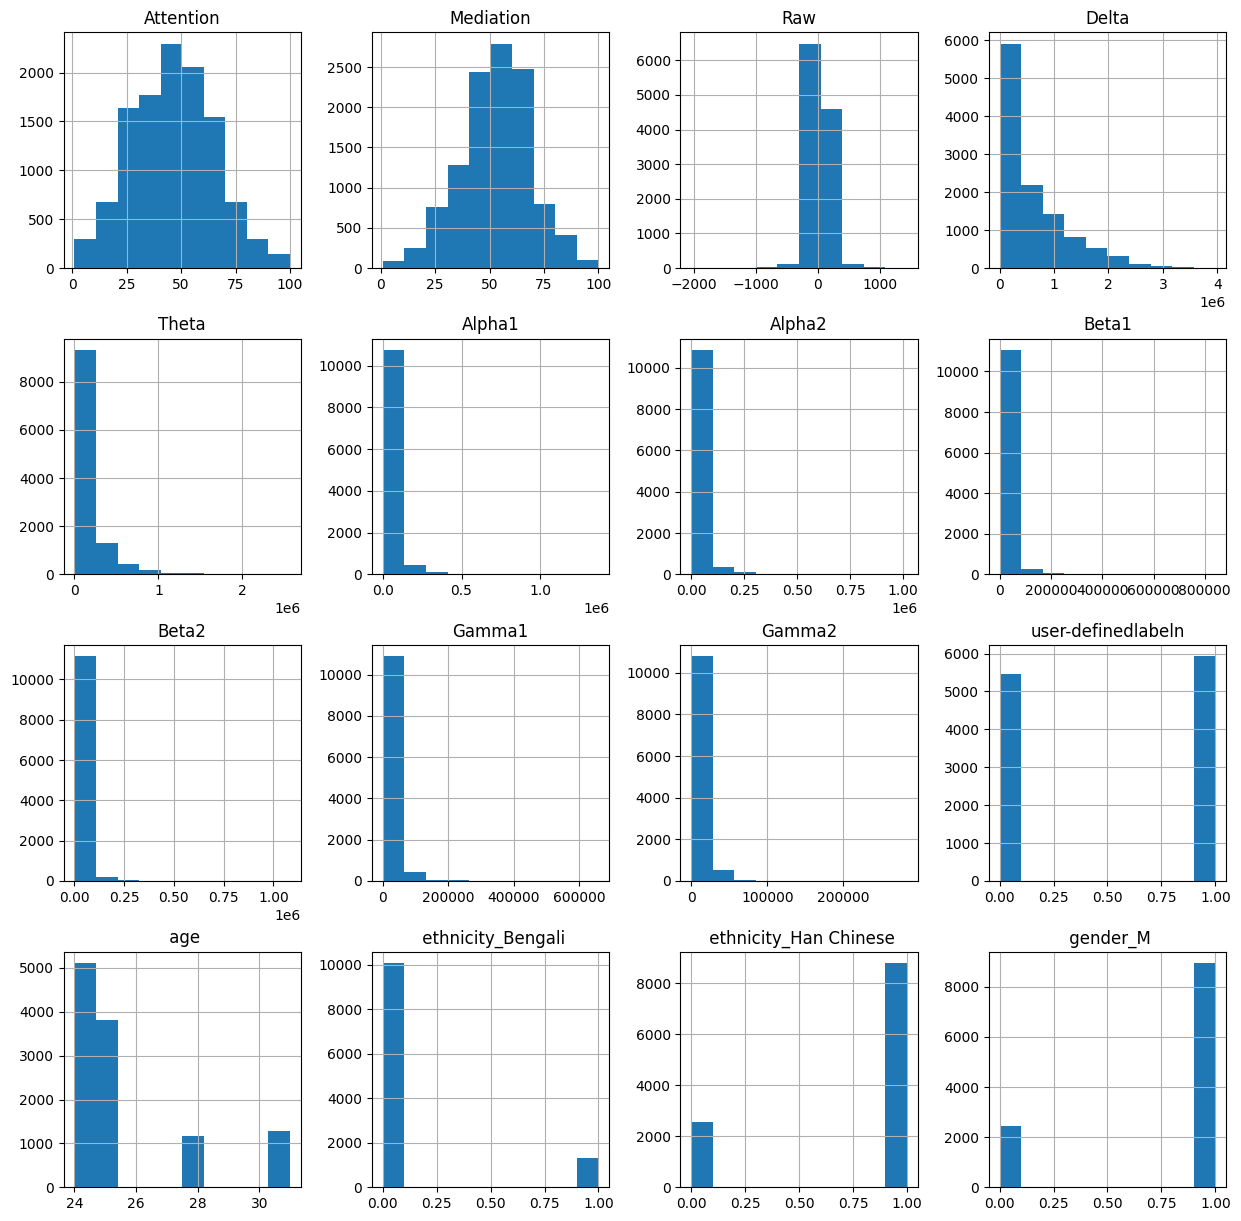

In [ ]:
df = df[df['Mediation']> 0.0]
df.hist(figsize = (15,15))
plt.show()

In [ ]:
df.shape

(11388, 16)

### Let's have a Correlation Matrix

<Axes: >

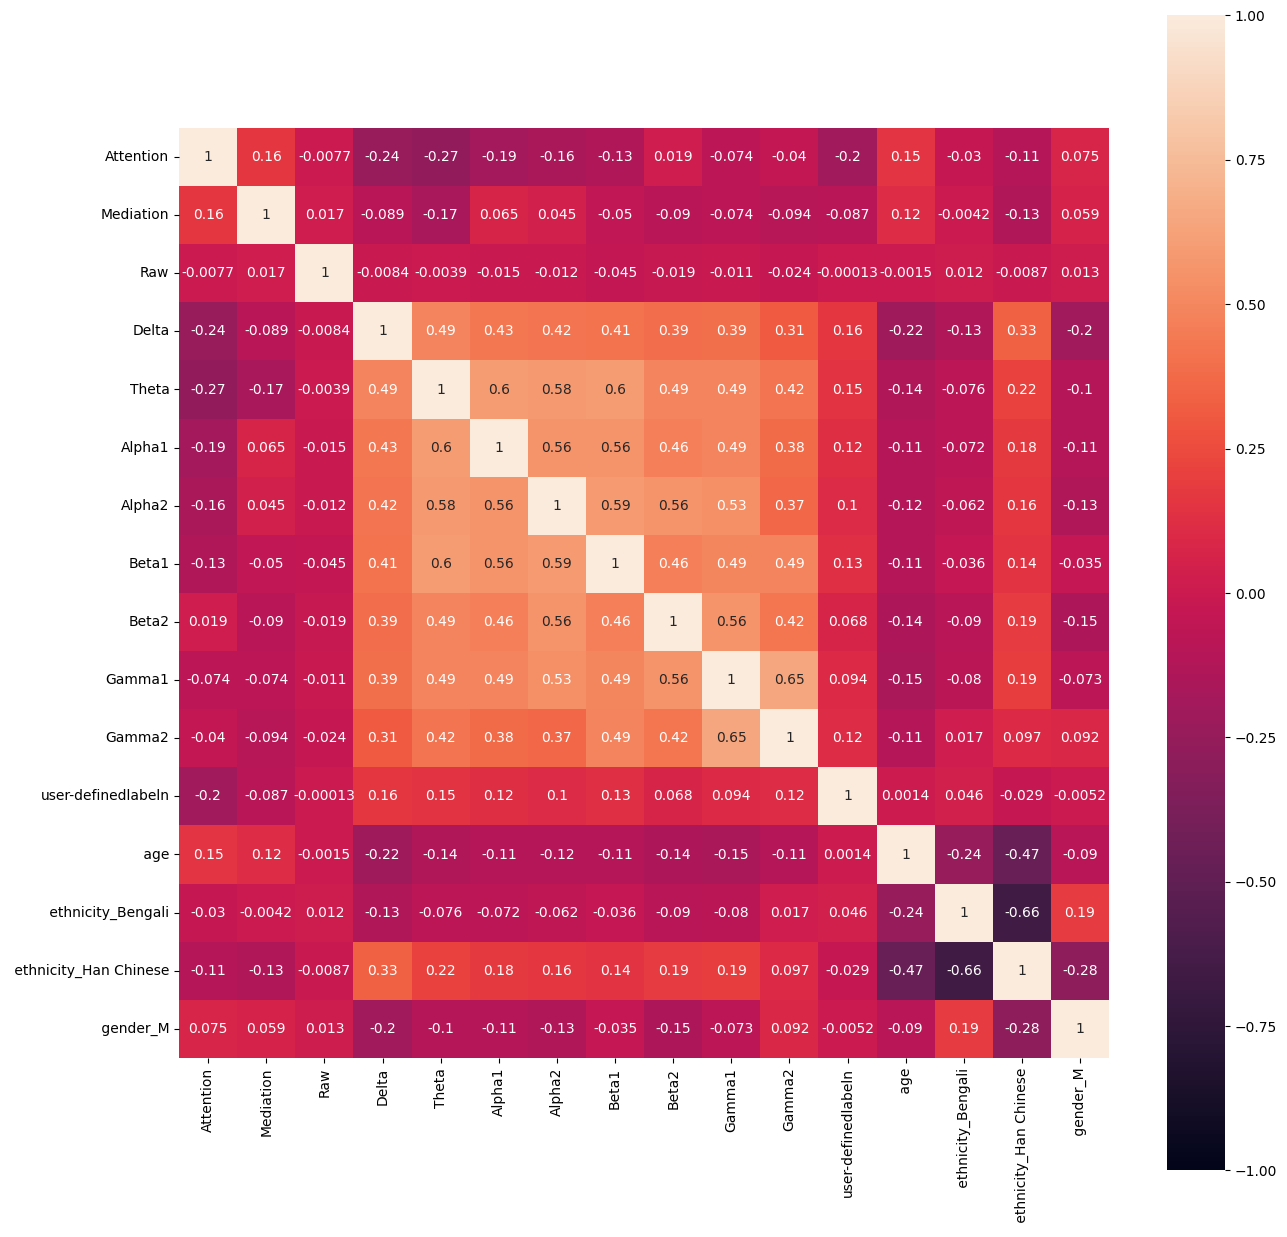

In [ ]:
plt.figure(figsize = (15,15))
corr_matrix = df.corr()
seaborn.heatmap(corr_matrix,vmin = -1.0, square=True, annot = True)

As from the heatmap, We see there is a good correlation between **Gamma1 and Beta2**

<Axes: xlabel='Gamma1', ylabel='Beta2'>

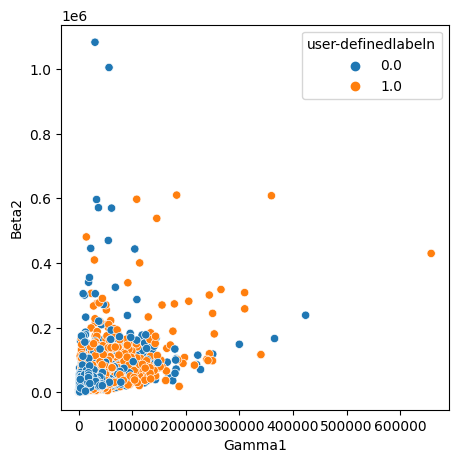

In [ ]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=df,x='Gamma1',y='Beta2',hue='user-definedlabeln')

In [ ]:
df.columns

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-definedlabeln', ' age',
       ' ethnicity_Bengali', ' ethnicity_Han Chinese', ' gender_M'],
      dtype='object')

In [ ]:
cols=[' ethnicity_Bengali',' ethnicity_Han Chinese',' gender_M',' age','user-definedlabeln','Raw','Mediation','Attention']
df_waves=df.drop(cols,axis=1)
df_waves.head(3)

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0


<Axes: >

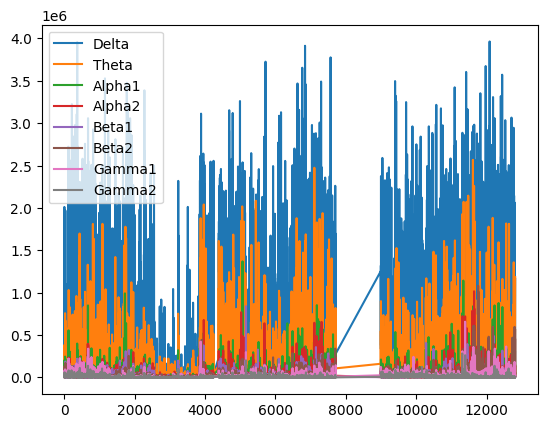

In [ ]:
df_waves.plot()

In [ ]:
df['user-definedlabeln'].unique()

array([0., 1.])

In [ ]:
df['user-definedlabeln'].value_counts()

1.0    5925
0.0    5463
Name: user-definedlabeln, dtype: int64

### Splitting the dataset based on user-defined labels

In [ ]:
X = np.array(df.drop(['user-definedlabeln'],axis = 1))

In [ ]:
y = np.array(df['user-definedlabeln'])

In [ ]:
X.min(), X.max()

(-2048.0, 3964663.0)

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Transforming data to have mean 0 and std 1

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X.min(), X.max()

(-15.829161155386538, 29.216116594451524)

## Data Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=2002)

# X_train.shape, y_train.shape

# X_test.shape, y_test.shape

X_train= np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

# X_train.shape

X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

# X_test.shape
X_train.shape

# X_train[0]

(10249, 15, 1)

In [ ]:
y_train.shape

(10249,)

In [ ]:
from tensorflow.keras import callbacks,layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
cb_checkpoint=callbacks.EarlyStopping(patience=120,min_delta=0.00001,restore_best_weights=True)
cb_reducelr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
    mode='min',
    factor=0.1,
    patience=10,
    verbose=1,
    min_lr=0.000001)

In [ ]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=50, activation='relu', input_shape=(15,)))
ann.add(tf.keras.layers.Dense(units=35, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 40)                640       
                                                                 
 dense_15 (Dense)            (None, 25)                1025      
                                                                 
 dense_16 (Dense)            (None, 15)                390       
                                                                 
 dense_17 (Dense)            (None, 1)                 16        
                                                                 
Total params: 2,071
Trainable params: 2,071
Non-trainable params: 0
_________________________________________________________________


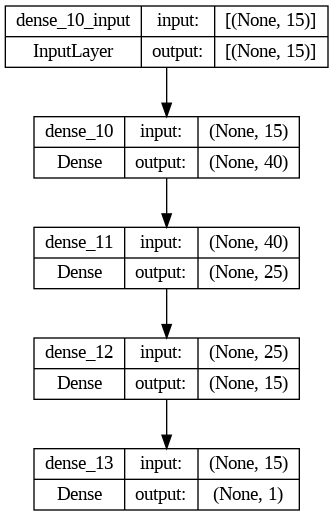

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 100, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/100
321/321 [==============================] - 8s 9ms/step - loss: 0.5676 - accuracy: 0.6984
Epoch 2/100
321/321 [==============================] - 5s 14ms/step - loss: 0.5638 - accuracy: 0.7056
Epoch 3/100
321/321 [==============================] - 2s 7ms/step - loss: 0.5617 - accuracy: 0.7066
Epoch 4/100
321/321 [==============================] - 3s 9ms/step - loss: 0.5595 - accuracy: 0.7031
Epoch 5/100
321/321 [==============================] - 3s 8ms/step - loss: 0.5593 - accuracy: 0.7044
Epoch 6/100
321/321 [==============================] - 3s 8ms/step - loss: 0.5580 - accuracy: 0.7072
Epoch 7/100
321/321 [==============================] - 3s 11ms/step - loss: 0.5558 - accuracy: 0.7077
Epoch 8/100
321/321 [==============================] - 3s 8ms/step - loss: 0.5546 - accuracy: 0.7085
Epoch 9/100
321/321 [==============================] - 1s 5ms/step - loss: 0.5526 - accuracy: 0.7109
Epoch 10/100
321/321 [==============================] - 1s 4ms/step - loss: 0.5503 - accu

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=28,epochs=200,callbacks=[cb_checkpoint, cb_reducelr])
#ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/200
367/367 [==============================] - 3s 5ms/step - loss: 0.6591 - accuracy: 0.6060 - val_loss: 0.6370 - val_accuracy: 0.6365 - lr: 0.0010
Epoch 2/200
367/367 [==============================] - 2s 6ms/step - loss: 0.6302 - accuracy: 0.6448 - val_loss: 0.6265 - val_accuracy: 0.6514 - lr: 0.0010
Epoch 3/200
367/367 [==============================] - 2s 6ms/step - loss: 0.6192 - accuracy: 0.6565 - val_loss: 0.6124 - val_accuracy: 0.6576 - lr: 0.0010
Epoch 4/200
367/367 [==============================] - 1s 4ms/step - loss: 0.6106 - accuracy: 0.6601 - val_loss: 0.6048 - val_accuracy: 0.6637 - lr: 0.0010
Epoch 5/200
367/367 [==============================] - 1s 4ms/step - loss: 0.6037 - accuracy: 0.6688 - val_loss: 0.5997 - val_accuracy: 0.6804 - lr: 0.0010
Epoch 6/200
367/367 [==============================] - 1s 4ms/step - loss: 0.5973 - accuracy: 0.6755 - val_loss: 0.5998 - val_accuracy: 0.6708 - lr: 0.0010
Epoch 7/200
367/367 [==============================] - 1s 4ms/st

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.50)
pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])

 1/36 [..............................] - ETA: 1s

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix for ANN: ", confusion_matrix(y_test, y_pred))
print("Accuracy for ANN: ", accuracy_score(y_test, y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='g',
            xticklabels=['not_confused', 'confused'],
            yticklabels=['not_confused', 'confused'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for ANN',fontsize=17)
plt.show()
print("Accuracy for ANN: ", accuracy_score(y_test, y_pred))

### SVM

---

New Section

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC

In [ ]:
# X_test.shape, y_test.shape

X_train2 = np.reshape(X_train,(X_train.shape[0], X_train.shape[1]))

# X_train.shape

X_test2 = np.reshape(X_test,(X_test.shape[0], X_test.shape[1]))

# X_test.shape
X_train2.shape

(10249, 15)

In [ ]:
model = SVC(kernel='rbf', probability = True)
model.fit(X_train2, y_train)
#print(model.score(X_train, y_train))
#print(model.score(X_test, y_test))
y_pred_svm_rbf = model.predict(X_test2)
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix for SVM with rbf kernel: ", confusion_matrix(y_test, y_pred_svm_rbf))
print("Accuracy for SVM with rbf kernel: ", accuracy_score(y_test, y_pred_svm_rbf))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_rbf),
            annot=True,
            fmt='g',
            xticklabels=['not_confused', 'confused'],
            yticklabels=['not_confused', 'confused'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
model2 = SVC(kernel='poly', degree = 5, probability = True)
model2.fit(X_train, y_train)
#print(model.score(X_train, y_train))
#print(model.score(X_test, y_test))
y_pred_svm_poly = model2.predict(X_test)
print("Confusion Matrix for SVM with polynomial kernel: ", confusion_matrix(y_test, y_pred_svm_poly))
print("Accuracy for SVM with polynomial kernel: ", accuracy_score(y_test, y_pred_svm_poly)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_poly),
            annot=True,
            fmt='g',
            xticklabels=['not_confused', 'confused'],
            yticklabels=['not_confused', 'confused'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for SVM with poly kernel',fontsize=17)
plt.show()
print("Accuracy for SVM with polynomial kernel: ", accuracy_score(y_test, y_pred_svm_poly))

**XgBoost**

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=5000)
xg.fit(X_train2,y_train)
#print(xg.predict(X_test2))
print(xg.score(X_test2,y_test))
y_pred = xg.predict(X_test2)
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix for SVM with rbf kernel: ", confusion_matrix(y_test, y_pred))


0.6953467954345918
Confusion Matrix for SVM with rbf kernel:  [[363 194]
 [153 429]]


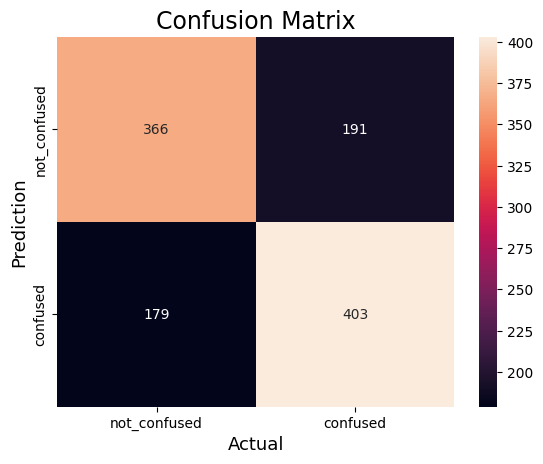

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_rbf),
            annot=True,
            fmt='g',
            xticklabels=['not_confused', 'confused'],
            yticklabels=['not_confused', 'confused'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**LSTM**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import shap
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Bidirectional, Input, Dropout, InputLayer, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

sns.set_style('dark')
shap.initjs()

In [ ]:
batch_size = [32]
epochs = [1]
optimizers = ['adam']
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizers)
param_grid

{'batch_size': [32], 'epochs': [1], 'optimizer': ['adam']}

In [ ]:
def LSTM_Model(optimizer='adam'):
    model = Sequential()
    model.add(InputLayer(input_shape=(15, 1)))
    model.add(Dense(64, activation='relu'))
    model.add(Bidirectional(LSTM(256, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(256, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

tf.random.set_seed(111)

model = KerasClassifier(build_fn=LSTM_Model, verbose=1)

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
plot_model(lstm_model,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )

In [ ]:
batch_size=16

lstm_model = LSTM_Model()

lstm_hist = lstm_model.fit(X_train, y_train,
                           validation_data=(X_test, y_test),
                           epochs=100,
                           steps_per_epoch=X_train.shape[0]//batch_size)

Epoch 1/100
640/640 [==============================] - 25s 16ms/step - loss: 0.6610 - accuracy: 0.5973 - val_loss: 0.6330 - val_accuracy: 0.6251
Epoch 2/100
640/640 [==============================] - 7s 10ms/step - loss: 0.6384 - accuracy: 0.6355 - val_loss: 0.6323 - val_accuracy: 0.6435
Epoch 3/100
640/640 [==============================] - 11s 18ms/step - loss: 0.6228 - accuracy: 0.6509 - val_loss: 0.5974 - val_accuracy: 0.6567
Epoch 4/100
640/640 [==============================] - 9s 14ms/step - loss: 0.6129 - accuracy: 0.6572 - val_loss: 0.6054 - val_accuracy: 0.6681
Epoch 5/100
640/640 [==============================] - 8s 12ms/step - loss: 0.5966 - accuracy: 0.6758 - val_loss: 0.5979 - val_accuracy: 0.6681
Epoch 6/100
640/640 [==============================] - 8s 12ms/step - loss: 0.5963 - accuracy: 0.6804 - val_loss: 0.5890 - val_accuracy: 0.6874
Epoch 7/100
640/640 [==============================] - 7s 11ms/step - loss: 0.5797 - accuracy: 0.6930 - val_loss: 0.5775 - val_accurac

640/640 [==============================] - 3s 4ms/step - loss: 0.0335 - accuracy: 0.9870 - val_loss: 2.9525 - val_accuracy: 0.6673


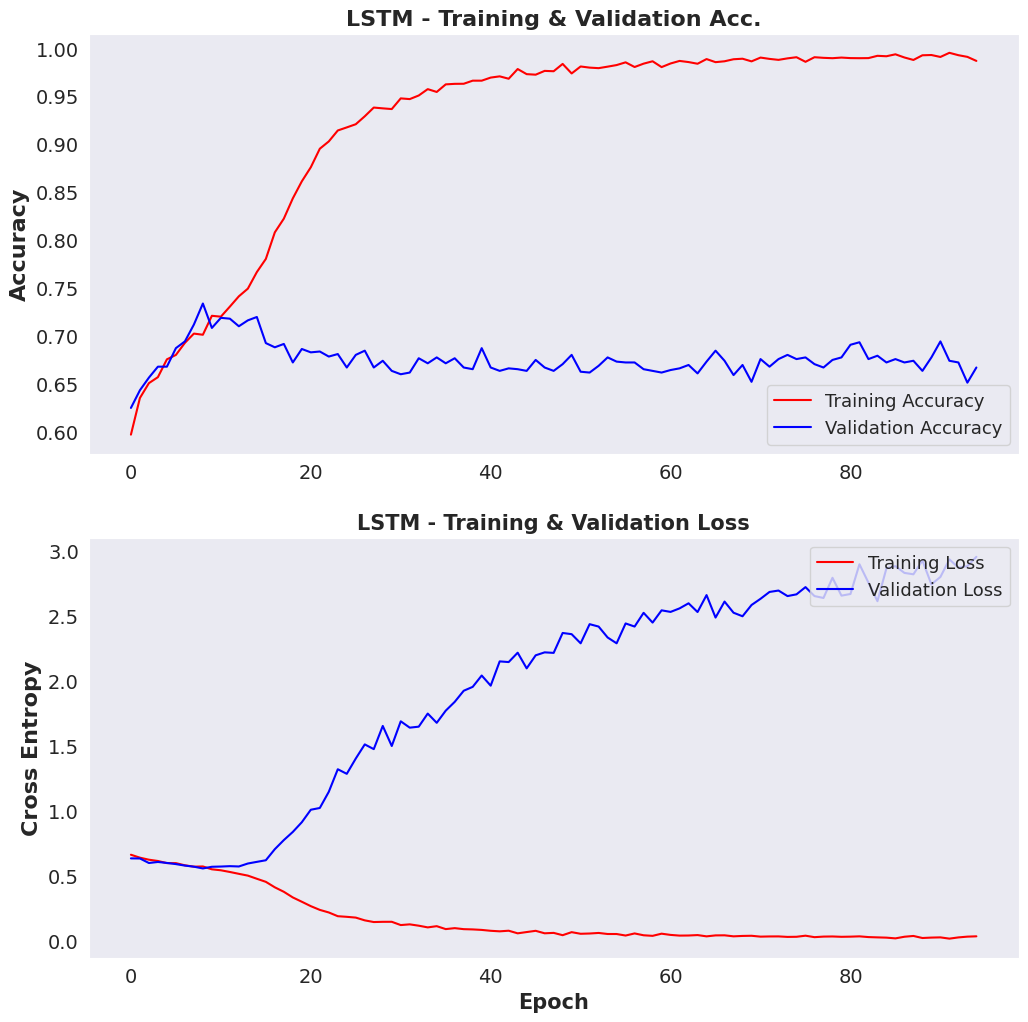

In [ ]:
%matplotlib inline

acc = lstm_hist.history['accuracy']
val_acc = lstm_hist.history['val_accuracy']

loss = lstm_hist.history['loss']
val_loss = lstm_hist.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [ ]:
y_pred=lstm_model.predict(X_test)
for idx in range(len(y_pred)):
  if y_pred[idx]>=0.5:
    y_pred[idx]=1
  else :
    y_pred[idx]=0
y_pred


AttributeError: ignored

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='g',
            xticklabels=['not_confused', 'confused'],
            yticklabels=['not_confused', 'confused'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()